# Regression Analysis

## predict salary of an employee using experience

### import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the dataset

In [2]:
df = pd.read_csv('./Salary_Data.csv')

### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  33 non-null     float64
 1   Salary           33 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 660.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,33.000000,33.000000
mean,5.921212,82760.303030
std,3.342413,34014.620992
min,1.100000,37731.000000
25%,3.200000,56957.000000
50%,5.100000,67938.000000
75%,8.700000,109431.000000
max,13.000000,156000.000000


In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.983642
Salary,0.983642,1.000000


### split the data into x and y

In [7]:
x = df.drop('Salary', axis=1)
y = df['Salary']

### split the data into train and test sets

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)

### build the model

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### model evaluation

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"mean absolute error: {mae}")
print(f"mean squared error: {mse}")
print(f"root mean squared error: {rmse}")
print(f"r2 score: {r2}")

mean absolute error: 4626.385857781732
mean squared error: 31886658.198734988
root mean squared error: 5646.827268363624
r2 score: 0.9753126345282958


### result visualization

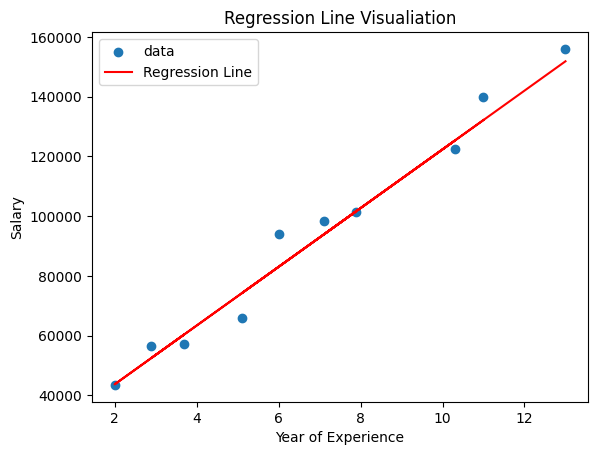

In [16]:
plt.scatter(x_test['YearsExperience'], y_test, label="data")
plt.plot(x_test['YearsExperience'], y_pred, color="red", label="Regression Line")
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.title('Regression Line Visualiation')
plt.legend()

### save the model

In [17]:
import pickle

with open("model.pkl", "wb") as file:
    pickle.dump(model, file)